In [91]:
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [92]:
data=pd.read_csv("bitcoins.csv",index_col=0)
data.reset_index(drop=True,inplace=True)

In [93]:
data.head()


,Rank,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24h),% 1h,% 24h,% 7d,Date
0,1,BTCBitcoin,BTC,"$609,409,213,147.03","$32,782.02","18,589,737 BTC","$78,665,235,201.84",-0.61%,2.04%,24.78%,03 January 2021
1,1,BTCBitcoin,BTC,"$713,304,617,760.95","$38,356.44","18,596,737 BTC","$79,980,747,690.35",-0.55%,-4.72%,17.00%,10 January 2021
2,1,BTCBitcoin,BTC,"$665,831,621,390.99","$35,791.28","18,603,181 BTC","$52,359,854,336.21",-1.24%,-1.07%,-6.69%,17 January 2021
3,1,BTCBitcoin,BTC,"$600,888,568,009.50","$32,289.38","18,609,481 BTC","$48,643,830,599.36",0.36%,0.69%,-9.78%,24 January 2021
4,1,BTCBitcoin,BTC,"$616,452,744,533.28","$33,114.36","18,615,875 BTC","$52,754,542,671.38",0.49%,-3.37%,2.55%,31 January 2021


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                205 non-null    int64 
 1   Name                205 non-null    object
 2   Symbol              205 non-null    object
 3   Market Cap          205 non-null    object
 4   Price               205 non-null    object
 5   Circulating Supply  205 non-null    object
 6   Volume (24h)        205 non-null    object
 7   % 1h                205 non-null    object
 8   % 24h               205 non-null    object
 9   % 7d                205 non-null    object
 10  Date                205 non-null    object
dtypes: int64(1), object(10)
memory usage: 17.7+ KB


In [95]:
data.isnull().sum()

Rank                  0
Name                  0
Symbol                0
Market Cap            0
Price                 0
Circulating Supply    0
Volume (24h)          0
% 1h                  0
% 24h                 0
% 7d                  0
Date                  0
dtype: int64

In [96]:
def limpiar(columna):
    txt_limpio = re.sub(r"[^\d.\-&]", "", columna)
    return txt_limpio


In [97]:
data["Market Cap"]=data["Market Cap"].apply(limpiar).astype(float)
data["Price"] = data["Price"].apply(limpiar).astype(float)
data["Circulating Supply"] = data["Circulating Supply"].apply(limpiar).astype(float)
data["Volume (24h)"] = data["Volume (24h)"].apply(limpiar).astype(float)
data["% 1h"]=data["% 1h"].apply(limpiar).astype(float)
data["% 24h"]=data["% 24h"].apply(limpiar).astype(float)
data["% 7d"]=data["% 7d"].apply(limpiar).astype(float)

In [98]:
data.head()

,Rank,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24h),% 1h,% 24h,% 7d,Date
0,1,BTCBitcoin,BTC,6.094092e+11,32782.02,18589737.0,7.866524e+10,-0.61,2.04,24.78,03 January 2021
1,1,BTCBitcoin,BTC,7.133046e+11,38356.44,18596737.0,7.998075e+10,-0.55,-4.72,17.00,10 January 2021
2,1,BTCBitcoin,BTC,6.658316e+11,35791.28,18603181.0,5.235985e+10,-1.24,-1.07,-6.69,17 January 2021
3,1,BTCBitcoin,BTC,6.008886e+11,32289.38,18609481.0,4.864383e+10,0.36,0.69,-9.78,24 January 2021
4,1,BTCBitcoin,BTC,6.164527e+11,33114.36,18615875.0,5.275454e+10,0.49,-3.37,2.55,31 January 2021


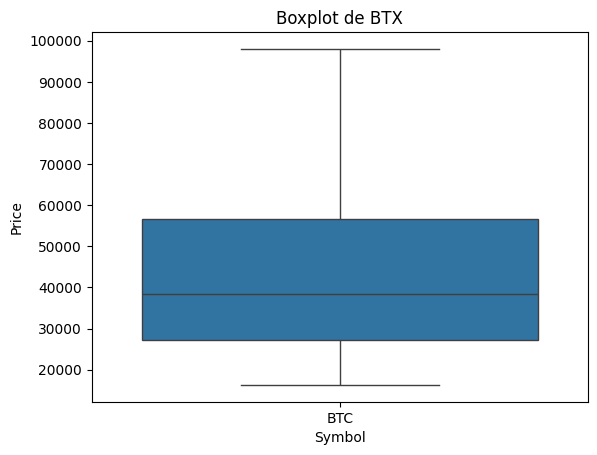

In [99]:
numeric_variables = data.select_dtypes(include=["int64", "float64"])


plt.figure()
sns.boxplot(x=data["Symbol"],y=data["Price"])
plt.title(f"Boxplot de BTX")
plt.show()

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [101]:
data = data.drop(['Rank', 'Name', 'Symbol'], axis=1)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek
data = data.drop('Date', axis=1)

In [105]:
data = data.fillna(data.mean())


In [106]:
X = data.drop('Price', axis=1)
y = data['Price']


In [108]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [109]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [112]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1033225.6782656632
